### Links
* https://medium.com/@jonathan_hui/gan-whats-generative-adversarial-networks-and-its-application-f39ed278ef09
* https://junyanz.github.io/CycleGAN/
* https://arxiv.org/pdf/1710.10196.pdf
* https://blog.paperspace.com/implementing-gans-in-tensorflow/
* https://github.com/YadiraF/GAN
* https://github.com/eriklindernoren/Keras-GAN

#### Extra links
* https://www.analyticsvidhya.com/blog/2017/06/introductory-generative-adversarial-networks-gans/
* https://skymind.ai/wiki/generative-adversarial-network-gan
* https://habr.com/post/352794/
* https://github.com/soumith/ganhacks

## GAN - What is generative Adversary Networks GAN?

GAN is about creating, like drawnin a portrait or composing a symphony. This is hard compared to other deep learning fields. For instance, it is much easier to identify a Moner painting than painting one.  

By applying automation with GAN, we may one day focus ourselves to the creating sides rather than repeating routine tasks daily.

## What does GAN do?

The main focus for GAN (Generative Adversarial Networks) is to generate data from scratch, mostly images but other domains including music have been done.

### Generator and discriminator

GAN composes of two deep networks, the generator, and the discriminator.

1. First, we sample some noise **z** using a normal or uniform distribution. With **z** as an input, we use a generator **G** to create an image **x** *(x=G(z))*. Yes, it sounds magical and we will explain it one-step at a time.

![image.png](attachment:image.png)

Conceptually, **z** represents the latent features of the images generated, for example, the color and the shape. In Deep learining classification, we don't control the features the model is learning. Similarly, in GAN, we don't control te semantic meaning of **z**. We let the training process to learn it.

To discover the meaning of *z*, the most effective way is to plot the generated images and examine ourselves. The following images are generated by progressive GAN using random noise *z*.

![image.png](attachment:image.png)

## How do GANs work?

There are two main components of a GAN - Generator Neural Network and Discriminator Neural Network

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

* The Generator Network takes an random input and tries to generate a sample of data. In the above image, we can see that generator G(z) takes a input $z$ from $p(z)$, where $z$ is a sample from probability distribution $p(z)$
* It then generates a data which is then fed into a discriminator network $D(x)$. The task of Discriminator Network is to take input either from the real data of from the generator and try to predict whether the input is real or generated. It takes an input $x$ from $p_{data}(x)$, where $p_{data}(x)$ is our real data distribution. $D(x)$ then solves binary classification problem using sigmoid function givin output in the range 0 to 1.

Let us define the notations we will be using to formalize our GAN:

1. $P_{data}(x)$ - the distribution of real data
2. $X$ - sample $P_{data}(x)$
3. $P(Z)$ - distribution of generator
4. $Z$ - sample from $P(Z)$
5. $G(Z)$ - Generator Network
6. $D(X)$ - Distriminator Network

Now the training of GAN is done as a fight between generator and discriminator. This can be represented mathematically as:

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

In our function V(D,G) the first term is entropy that the data from real distribution ($P_{data}$) passes through the discriminator (aka best case scenario). The discriminator tries to **maximize** this to 1.

The second term is entropy that the data from random input ($P(Z)$) passes through the generator, which then generates a fake sample which is then passed through the discriminator to identify the fakeness (aka worst case scenario). In this term, discriminator tries to **maximize** it to 0. (i.e. the log probability that the data from generated is fake is equal to 0).

**So overall, the discriminator is trying to maximize our function V.**

** The task of generator is exactly opposite, i.e. it tries to minimize the function V** - so that the differentation between real and fake data is bare minimum. This, in other words is a cat and mouse game between generator and discriminator.

*This method of training a GAN is taken from game theory called the minimax game*

## Parts of training GAN

So broadly a training phase has two main subparts and they are done sequentially

* Pass 1: Train discriminator and freeze generator (freezing means setting training as false). The network does only forward pass and no backpropagation is applied)

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

* Pass 2: Train generator and freeze discriminator

![%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png](attachment:%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5.png)

### Steps to train a GAN

1. **Define the problem**. Do you want to generate fake images or fake text. Here you should completely define the problem and collect data for it.

2. **Define architecture of GAN**. Define how your GAN should look like. Should both your generator and discriminator be multi-layer perceptrons, or convolutional neural networks? This step will depend on what problem you are trying to solve.

3. **Train Discriminator on real data for n epochs**. Get the data you want to generate fake on and train the discriminator to correctly predict them as real. Here value *n* can be any natural number [0,inf]

4. **Generate fake inputs for generator and train discriminator on fake data**. Get generated data and ket the discriminator correctly predict them as fake.

5. **Train generator with the output of discriminator**. Now when the discriminator is trained, you can get irs predictions and use it as an objective for training the generator. Train the generator to fool the discriminator.

6. **Repeat step 3 to step5 for a few epochs**

7. **Chech if the fake data manually if it seems legit. IF it seems appropriate, stop training, else go to step 3**. This is a bit manual task, as hand evaluationg the data is the best way to check the fakeness. When this step is over, you can evaluate whether the GAN is performing well enough.

The pseudo code below puts everything together and shows how GAN is trained.

![image.png](attachment:image.png)

** So what is this magic generator G?**  
The following is the DCGAN which is one of the most popular designs for the generator network. It performs multiple transposed convolutions to upsample *z* to generate the image *x*. We can view it as the deep learning classifier in the reverse direction.

![image.png](attachment:image.png)

But a generator alone will just create random noise. Conceptually, the discriminator in GAN provides guidance to the generator on what images to create. Let's consider a GAN's application, CycleGAN, that uses a generator to convert real scenery into a Monet style painting.

![image.png](attachment:image.png)

GAN builds a discriminator to learn what contributes as real images, and it provides feedback to the generator to create paintings that look like the real Monet paintings.

![image.png](attachment:image.png)

So how is it done technically? The discriminator looks at real images (training samples) and generated images separately. It distinguishes whether the input image to the discriminator is real or generated. The output *D(x)* is the probability that the input *x* is real, i.e. *P(class of input == real image)*.

![image.png](attachment:image.png)

We train the discriminator just like a deep network classifier. If the input is real, we wand *D(x)=1*. If it is generated, it should be zero. Through this process, the discriminator identifies features that contribute to real images.

On the other hand, we want the generator to create images with *D(x)=1*. So we can train the generator by backpropagation this target value all the way back to the generator, i.r. we train the generator to create images that towards what the discriminator thinks it is real.

![image.png](attachment:image.png)

We train both networks in alternating steps and lock them into a fierce competition to improve themselves. Eventually, the discriminator identifies the tiny difference between the real and the generated, and the generator creates images that the discriminator cannot tell the diffirence. The GAN model eventually converges and produces natural look images.

This discriminator concept can be applied to many existing deep learning applications also. The discriminator in GAN acts as a critic. We can plug the discriminator into existing deep leaning solutions to provide feedback to make it better.

![image.png](attachment:image.png)

### Backpropagation

Now, we will go through some simple equations. The discriminator outputs a value **D(X)** indicating the change that **x** is a real image. Our objectivee is to mazimize the change to recognize real images as real and generated images as fake. i.e. the maximum likelihood of the observed data. To measure the loss, we use **cross-entropy** as in most Deep Learning: **p log(q)**. For real image, **p** (the true lavel for real images) equals to 1. For generated images, we reverse the label using (**1-label**). So the objective becomes (for discriminator):

![image.png](attachment:image.png)

On the generator side, its objective function wants the model to generate images with the highest possible value of **D(x)** to fool the discriminator.

![image.png](attachment:image.png)

We often define GAN as minimax game which **G** wants to minimize **V** while **D** wants to mazimize it.

![image.png](attachment:image.png)

Once both objective functions are defined, they are learned jointly by the alternating gradient descent. We fix the generator model's parameters and perform a single iteration of gradient descent on the discriminator using the real and the generated images. Then we switch sides. Fix the disciminator and train the generator for another single iteration. We train both networks in alternating steps unitl the generator produces good quality images. The following summarizes the data flow and the gradients used for the packpropagation.

![image.png](attachment:image.png)

In [1]:
#import modules

import os
import numpy as np
import pandas as pd
from scipy.misc import imread

import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer, Activation, Input, BatchNormalization
from keras.regularizers import L1L2
from keras.layers.advanced_activations import LeakyReLU

from keras import Model

from keras.datasets import mnist

import matplotlib.pyplot as plt

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# to stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

In [3]:
(X_train, Y_train), (X_test,Y_test) = mnist.load_data()

In [4]:
# define variables
g_input_shape = 100
d_input_shape = (28,28)

hidden_1_num_units = 500
hidden_2_num_units = 500

g_output_num_units = 784
d_output_num_units = 1

epochs = 30000
batch_size = 128

In [5]:
# define  generator

def get_generator():
    
    model = Sequential()
    
    model.add(Dense(256, input_dim=g_input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024, activation='relu'))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(g_output_num_units, activation='tanh'))
    model.add(Reshape(d_input_shape))

    #model.summary()

    noise = Input(shape=(g_input_shape,))
    img = model(noise)

    return Model(noise, img)


g_model = get_generator()
    


In [6]:
# define discriminator

def get_discriminator():
    model = Sequential()

    model.add(Flatten(input_shape=d_input_shape))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    #model.summary()

    img = Input(shape=d_input_shape)
    validity = model(img)

    return Model(img, validity)

d_model = get_discriminator()

In [7]:
# Freeze weights in the discriminator for stacked training

def make_trainable(net,val):
    net.trainable = val
    for l in net.layers:
        l.trainable = val
        

In [8]:
# Compile discriminator
d_model.compile(loss='binary_crossentropy',
         optimizer='adam',
         metrics=['accuracy'])

d_model # Our read discriminator

# Prepare generator
z = Input((g_input_shape,))
img = g_model(z) #Our real generator

# For the combined model we will only train the generator
make_trainable(d_model,False)

In [9]:
# The discriminator takes generated images as input and determines validity
validity = d_model(img)

# The combined model (stacked generator and discriminator)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer='adam')

In [10]:
combined.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 100)               0         
_________________________________________________________________
model_1 (Model)              (None, 28, 28)            1493520   
_________________________________________________________________
model_2 (Model)              (None, 1)                 533505    
Total params: 2,027,025
Trainable params: 1,489,936
Non-trainable params: 537,089
_________________________________________________________________


In [11]:
def sample_images(epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, g_input_shape))
        gen_imgs = g_model.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        plt.plot(gen_imgs[1])


In [14]:
def train():
    global X_train
    # Rescale -1 to 1
    X_train = X_train / 127.5 - 1.
    X_train = np.expand_dims(X_train, axis=3)
    
    # Adversarial ground truths
    valid = np.ones((batch_size,1))
    fake = np.zeros((batch_size,1))
    
    for epoch in range(epochs):
        
        # -------------------
        # 3. Train discriminator
        # -------------------
        
        # Select a random batch of images
        idx = np.random.randint(0, X_train.shape[0],batch_size)
        imgs = X_train[idx]
        
        # Train the discriminator
        d_loss_real = d_model.train_on_batch(imgs,valid)

        
        # -------------------
        # 4. Generate fake inputs for generator and train discriminator on fake data
        # -------------------
        
        noise = np.random.normal(0,1,(batch_size, g_input_shape)) 
        
        # Generate a batch of new images
        gen_imgs = g_model.predict(noise)
        
        d_loss_fake = d_model.train_on_batch(gen_imgs,fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        
        
        # ----------------------
        # 5. Train generator with the output of discriminator
        # ----------------------
        
        noise = np.random.normal(0,1,(batch_size, g_input_shape)) 
        
        # Train the generator ( to have the discriminator label samples as valid)
        g_loss = combined.train_on_batch(noise, valid)
        
        
        # If at save interval => save generated image samples
        if epoch % 100 == 0:
            
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            sample_images(epoch)

In [15]:
train()

ValueError: Error when checking input: expected input_2 to have 3 dimensions, but got array with shape (128, 28, 28, 1)

In [20]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from keras.layers import Input
from keras.models import Model, Sequential
from keras.layers.core import Reshape, Dense, Dropout, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Convolution2D, UpSampling2D
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K
from keras import initializers

K.set_image_dim_ordering('th')

# Deterministic output.
# Tired of seeing the same results every time? Remove the line below.
np.random.seed(1000)

# The results are a little better when the dimensionality of the random vector is only 10.
# The dimensionality has been left at 100 for consistency with other GAN implementations.
randomDim = 100

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = (X_train.astype(np.float32) - 127.5)/127.5
X_train = X_train.reshape(60000, 784)

# Optimizer
adam = Adam(lr=0.0002, beta_1=0.5)

generator = Sequential()
generator.add(Dense(256, input_dim=randomDim, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
generator.add(LeakyReLU(0.2))
generator.add(Dense(512))
generator.add(LeakyReLU(0.2))
generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))
generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy', optimizer=adam)

discriminator = Sequential()
discriminator.add(Dense(1024, input_dim=784, kernel_initializer=initializers.RandomNormal(stddev=0.02)))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer=adam)

# Combined network
discriminator.trainable = False
ganInput = Input(shape=(randomDim,))
x = generator(ganInput)
ganOutput = discriminator(x)
gan = Model(inputs=ganInput, outputs=ganOutput)
gan.compile(loss='binary_crossentropy', optimizer=adam)

dLosses = []
gLosses = []

# Plot the loss from each batch
def plotLoss(epoch):
    plt.figure(figsize=(10, 8))
    plt.plot(dLosses, label='Discriminitive loss')
    plt.plot(gLosses, label='Generative loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig('images/gan_loss_epoch_%d.png' % epoch)

# Create a wall of generated MNIST images
def plotGeneratedImages(epoch, examples=100, dim=(10, 10), figsize=(10, 10)):
    noise = np.random.normal(0, 1, size=[examples, randomDim])
    generatedImages = generator.predict(noise)
    generatedImages = generatedImages.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generatedImages.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(generatedImages[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('images/gan_generated_image_epoch_%d.png' % epoch)

# Save the generator and discriminator networks (and weights) for later use
def saveModels(epoch):
    generator.save('models/gan_generator_epoch_%d.h5' % epoch)
    discriminator.save('models/gan_discriminator_epoch_%d.h5' % epoch)

def train(epochs=1, batchSize=128):
    batchCount = X_train.shape[0] // batchSize
    print('Epochs:', epochs)
    print('Batch size:', batchSize)
    print('Batches per epoch:', batchCount)

    for e in range(1, epochs+1):
        print('-'*15, 'Epoch %d' % e, '-'*15)
        for _ in tqdm(range(batchCount)):
            # Get a random set of input noise and images
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            imageBatch = X_train[np.random.randint(0, X_train.shape[0], size=batchSize)]

            # Generate fake MNIST images
            generatedImages = generator.predict(noise)
            # print np.shape(imageBatch), np.shape(generatedImages)
            X = np.concatenate([imageBatch, generatedImages])

            # Labels for generated and real data
            yDis = np.zeros(2*batchSize)
            # One-sided label smoothing
            yDis[:batchSize] = 0.9

            # Train discriminator
            discriminator.trainable = True
            dloss = discriminator.train_on_batch(X, yDis)

            # Train generator
            noise = np.random.normal(0, 1, size=[batchSize, randomDim])
            yGen = np.ones(batchSize)
            discriminator.trainable = False
            gloss = gan.train_on_batch(noise, yGen)

        # Store loss of most recent batch from this epoch
        dLosses.append(dloss)
        gLosses.append(gloss)

        if e == 1 or e % 3 == 0:
            print('save')
            plotGeneratedImages(e)
            saveModels(e)

    # Plot losses from every epoch
    plotLoss(e)


Epochs: 200
Batch size: 128
Batches per epoch: 468
--------------- Epoch 1 ---------------


100%|██████████| 468/468 [00:13<00:00, 35.49it/s]


save
--------------- Epoch 2 ---------------


100%|██████████| 468/468 [00:09<00:00, 47.52it/s]


--------------- Epoch 3 ---------------


100%|██████████| 468/468 [00:09<00:00, 47.92it/s]


save
--------------- Epoch 4 ---------------


100%|██████████| 468/468 [00:09<00:00, 50.32it/s]


--------------- Epoch 5 ---------------


100%|██████████| 468/468 [00:09<00:00, 47.33it/s]


--------------- Epoch 6 ---------------


100%|██████████| 468/468 [00:09<00:00, 47.64it/s]


save
--------------- Epoch 7 ---------------


100%|██████████| 468/468 [00:10<00:00, 45.03it/s]


--------------- Epoch 8 ---------------


100%|██████████| 468/468 [00:09<00:00, 50.00it/s]


--------------- Epoch 9 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.88it/s]


save
--------------- Epoch 10 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.39it/s]


--------------- Epoch 11 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.32it/s]


--------------- Epoch 12 ---------------


100%|██████████| 468/468 [00:09<00:00, 52.74it/s]


save
--------------- Epoch 13 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.39it/s]


--------------- Epoch 14 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.52it/s]


--------------- Epoch 15 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.48it/s]


save
--------------- Epoch 16 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.06it/s]


--------------- Epoch 17 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.52it/s]


--------------- Epoch 18 ---------------


100%|██████████| 468/468 [00:09<00:00, 48.32it/s]


save
--------------- Epoch 19 ---------------


100%|██████████| 468/468 [00:09<00:00, 50.05it/s]


--------------- Epoch 20 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.52it/s]


--------------- Epoch 21 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.66it/s]


save
--------------- Epoch 22 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.00it/s]


--------------- Epoch 23 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.61it/s]


--------------- Epoch 24 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.44it/s]


save
--------------- Epoch 25 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.48it/s]


--------------- Epoch 26 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.52it/s]


--------------- Epoch 27 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.97it/s]


save
--------------- Epoch 28 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.57it/s]


--------------- Epoch 29 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.37it/s]


--------------- Epoch 30 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.70it/s]


save
--------------- Epoch 31 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.04it/s]


--------------- Epoch 32 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.15it/s]


--------------- Epoch 33 ---------------


100%|██████████| 468/468 [00:10<00:00, 46.61it/s]


save
--------------- Epoch 34 ---------------


100%|██████████| 468/468 [00:09<00:00, 48.91it/s]


--------------- Epoch 35 ---------------


100%|██████████| 468/468 [00:09<00:00, 47.50it/s]


--------------- Epoch 36 ---------------


100%|██████████| 468/468 [00:09<00:00, 48.17it/s]


save
--------------- Epoch 37 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.52it/s]


--------------- Epoch 38 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.97it/s]


--------------- Epoch 39 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.97it/s]


save
--------------- Epoch 40 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.48it/s]


--------------- Epoch 41 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.75it/s]


--------------- Epoch 42 ---------------


100%|██████████| 468/468 [00:09<00:00, 49.66it/s]


save
--------------- Epoch 43 ---------------


100%|██████████| 468/468 [00:09<00:00, 49.23it/s]


--------------- Epoch 44 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.15it/s]


--------------- Epoch 45 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.64it/s]


save
--------------- Epoch 46 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.97it/s]


--------------- Epoch 47 ---------------


100%|██████████| 468/468 [00:08<00:00, 53.24it/s]


--------------- Epoch 48 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.81it/s]


save
--------------- Epoch 49 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.52it/s]


--------------- Epoch 50 ---------------


100%|██████████| 468/468 [00:09<00:00, 50.50it/s]


--------------- Epoch 51 ---------------


100%|██████████| 468/468 [00:10<00:00, 53.52it/s]


save
--------------- Epoch 52 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.39it/s]


--------------- Epoch 53 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.19it/s]


--------------- Epoch 54 ---------------


100%|██████████| 468/468 [00:09<00:00, 51.31it/s]


save
--------------- Epoch 55 ---------------


100%|██████████| 468/468 [00:08<00:00, 52.19it/s]


--------------- Epoch 56 ---------------


100%|██████████| 468/468 [00:09<00:00, 49.70it/s]


--------------- Epoch 57 ---------------


100%|██████████| 468/468 [00:09<00:00, 50.29it/s]


save
--------------- Epoch 58 ---------------


100%|██████████| 468/468 [00:12<00:00, 37.19it/s]


--------------- Epoch 59 ---------------


100%|██████████| 468/468 [00:09<00:00, 47.42it/s]


--------------- Epoch 60 ---------------


100%|██████████| 468/468 [00:10<00:00, 47.68it/s]


save


C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


--------------- Epoch 61 ---------------


100%|██████████| 468/468 [00:10<00:00, 46.73it/s]


--------------- Epoch 62 ---------------


  8%|▊         | 39/468 [00:00<00:08, 48.57it/s]


KeyboardInterrupt: 

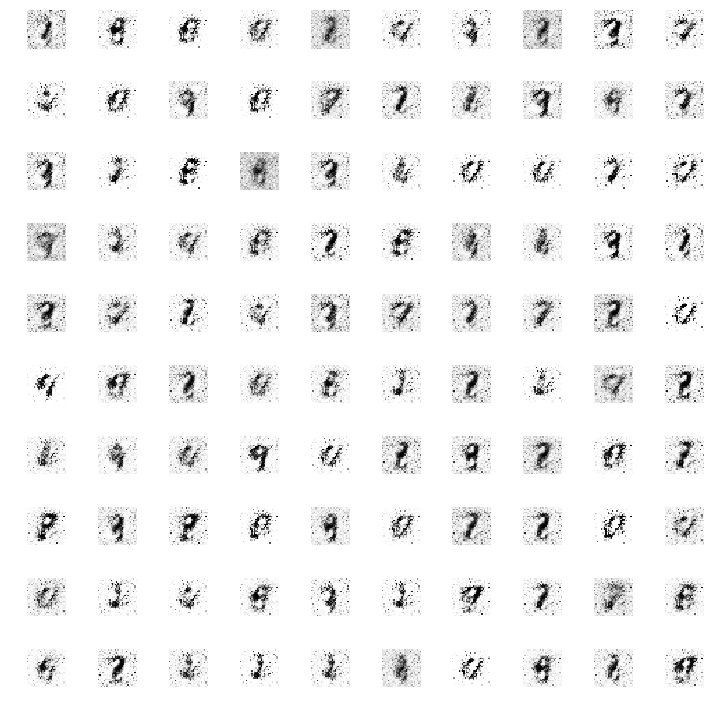

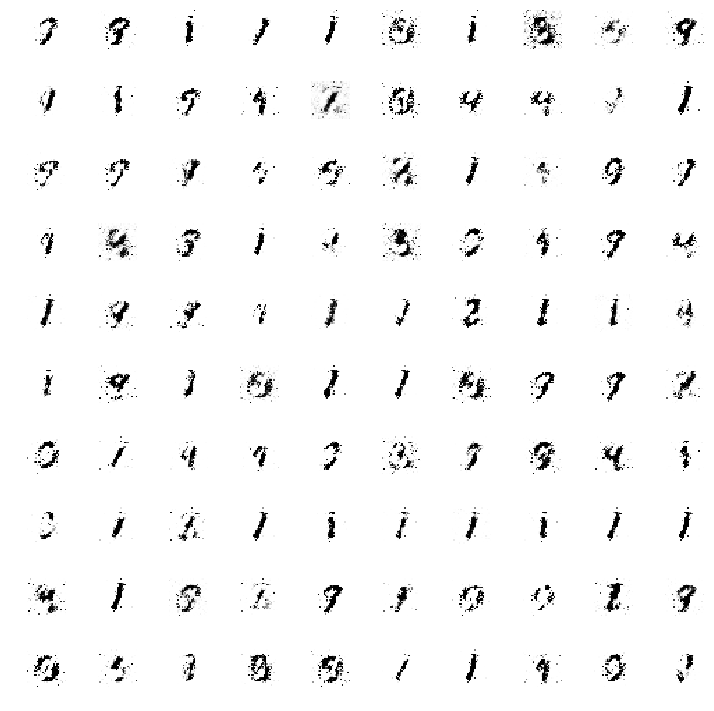

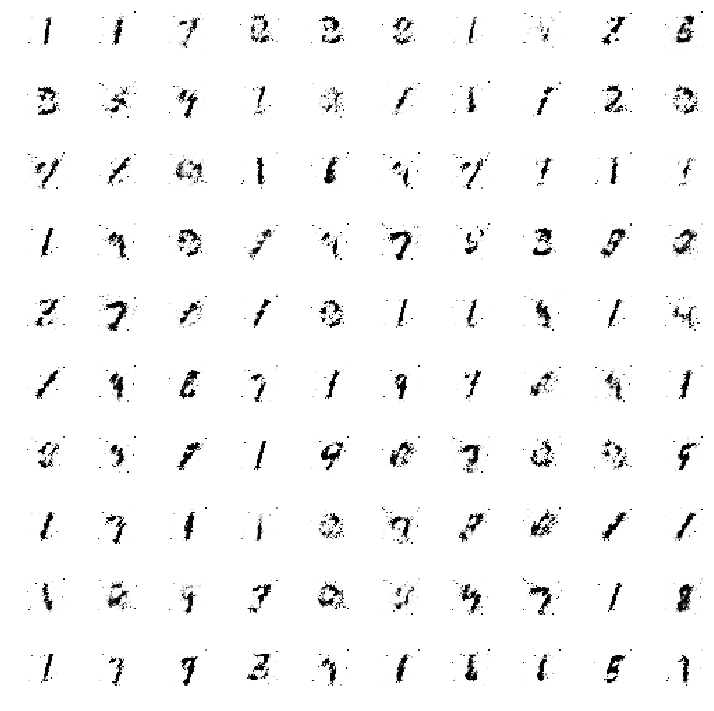

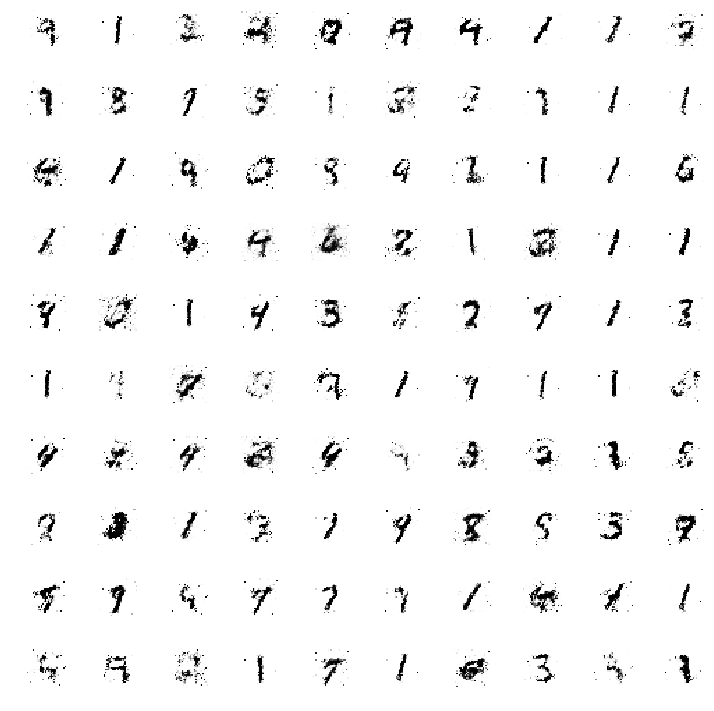

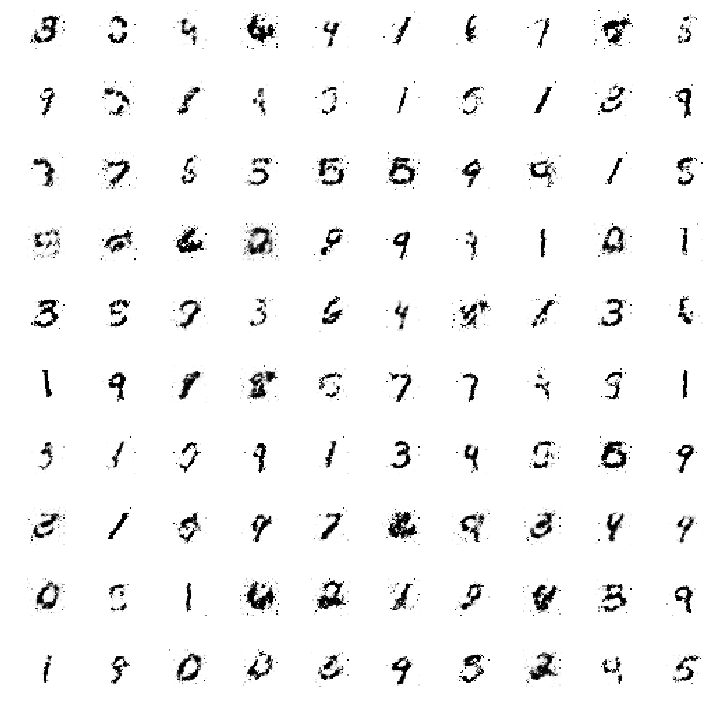

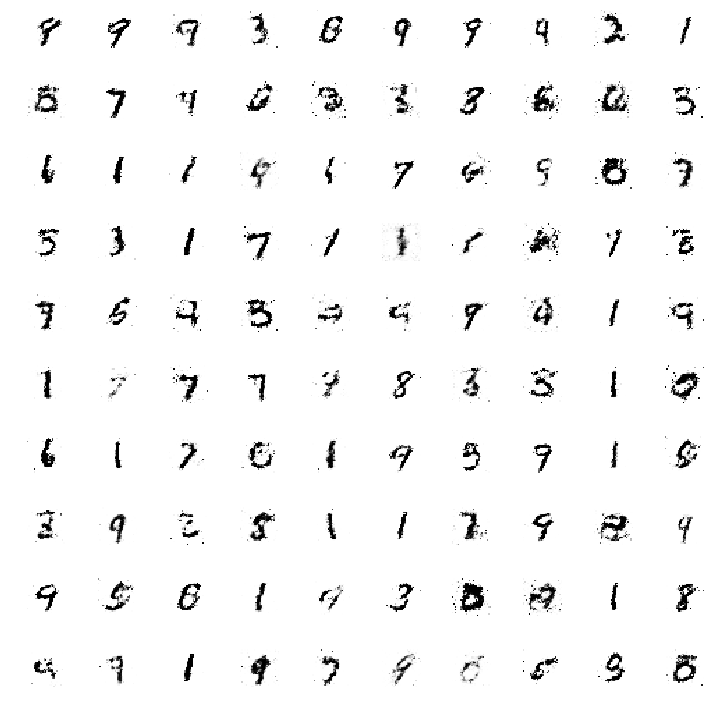

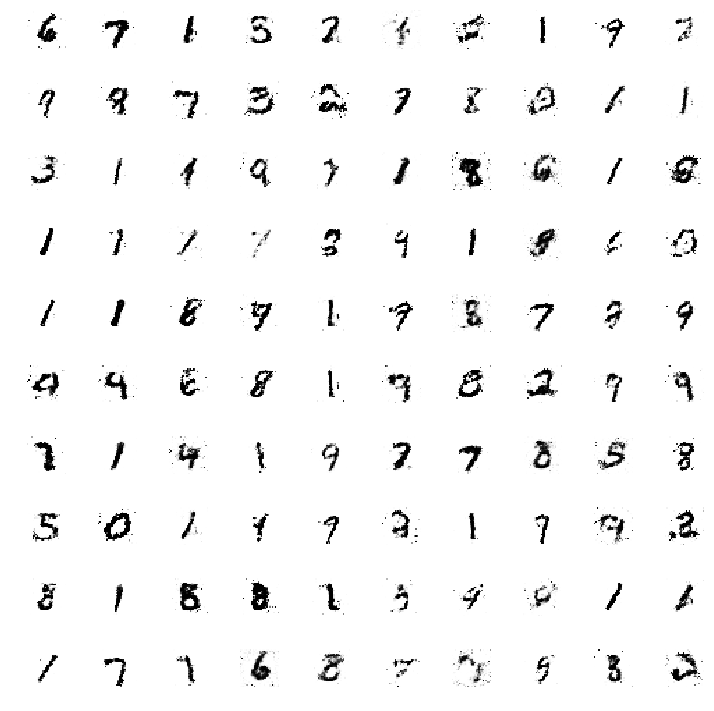

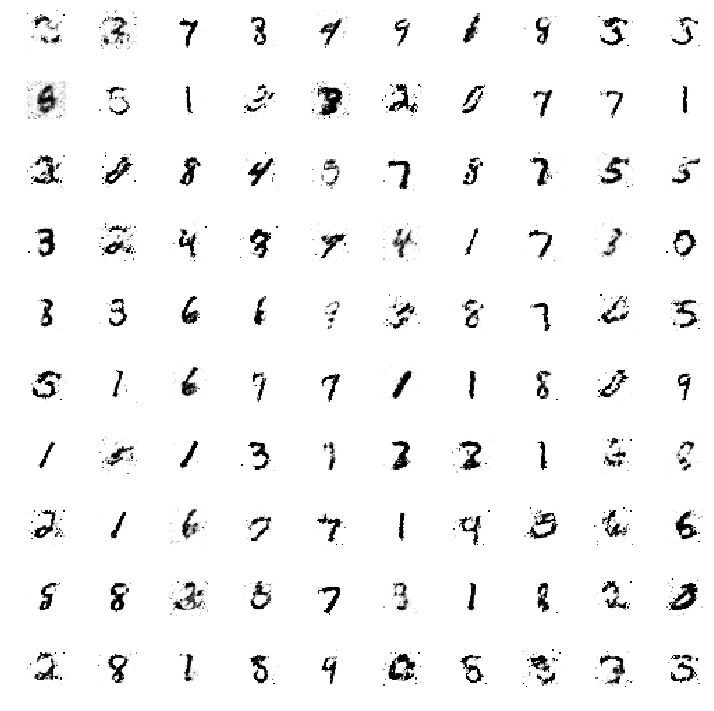

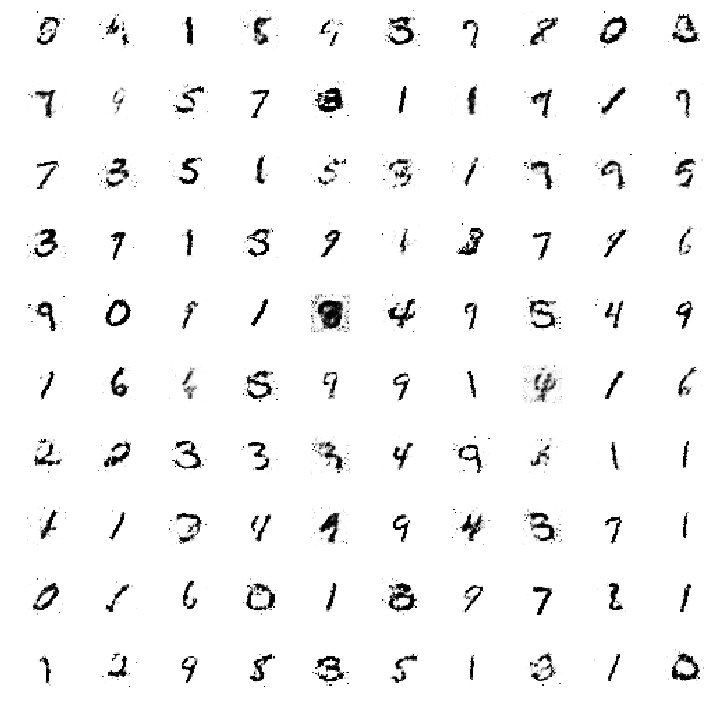

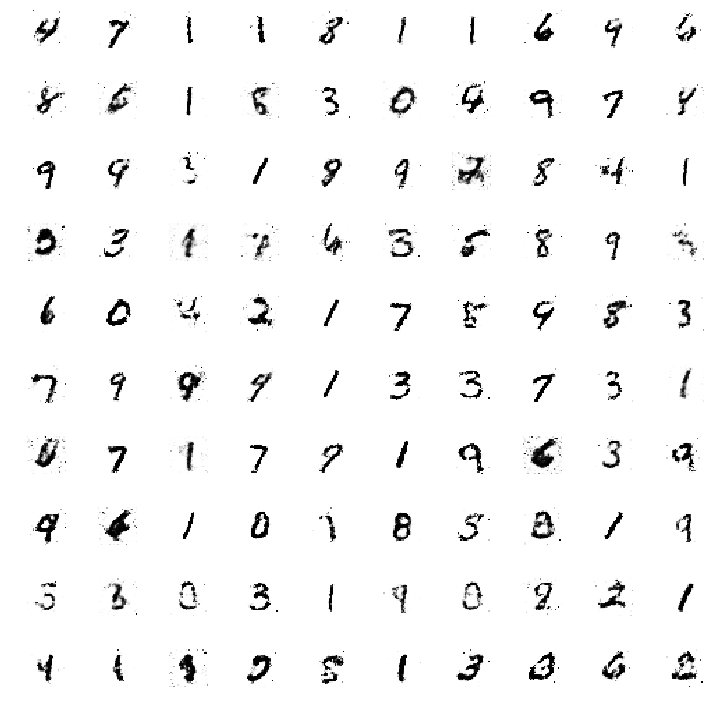

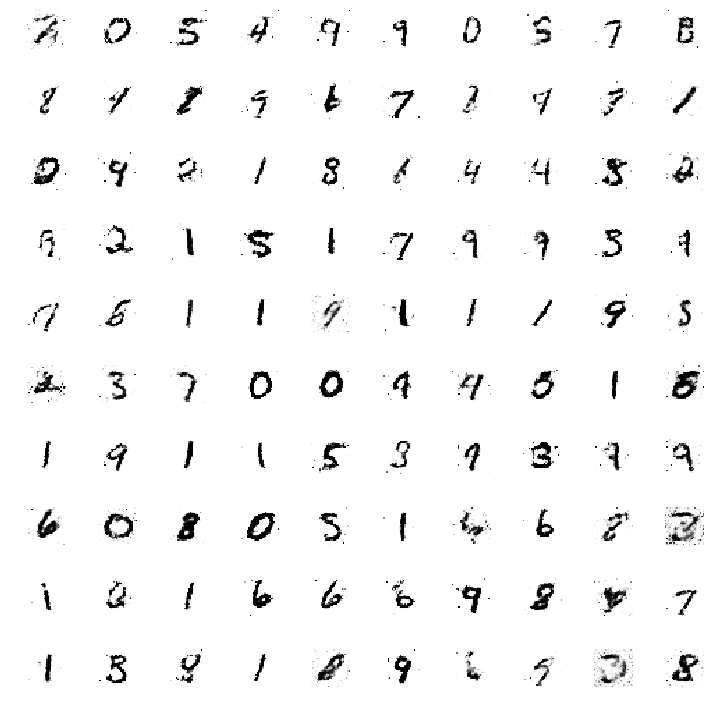

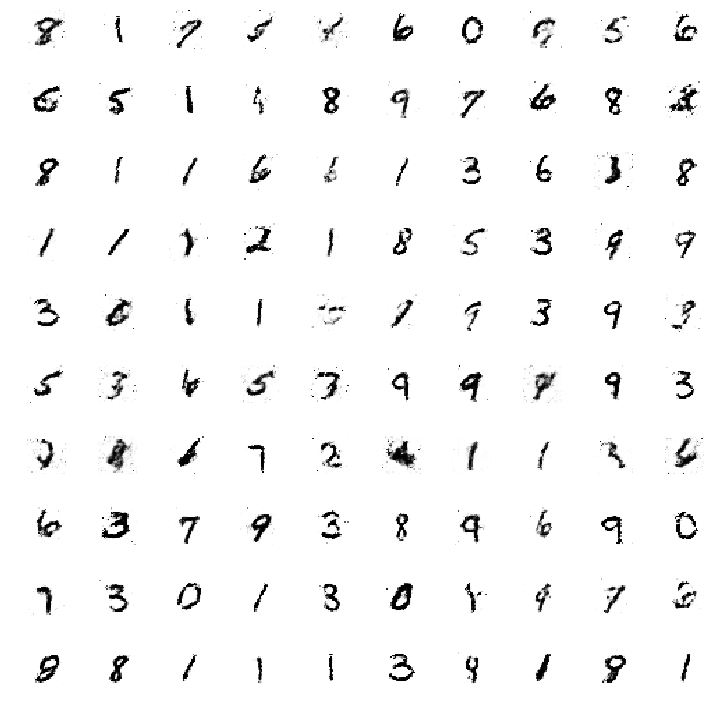

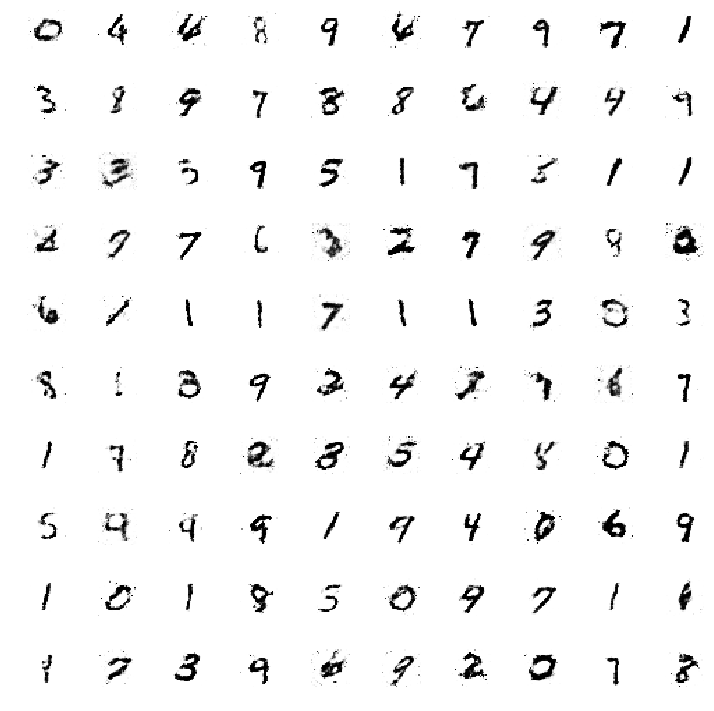

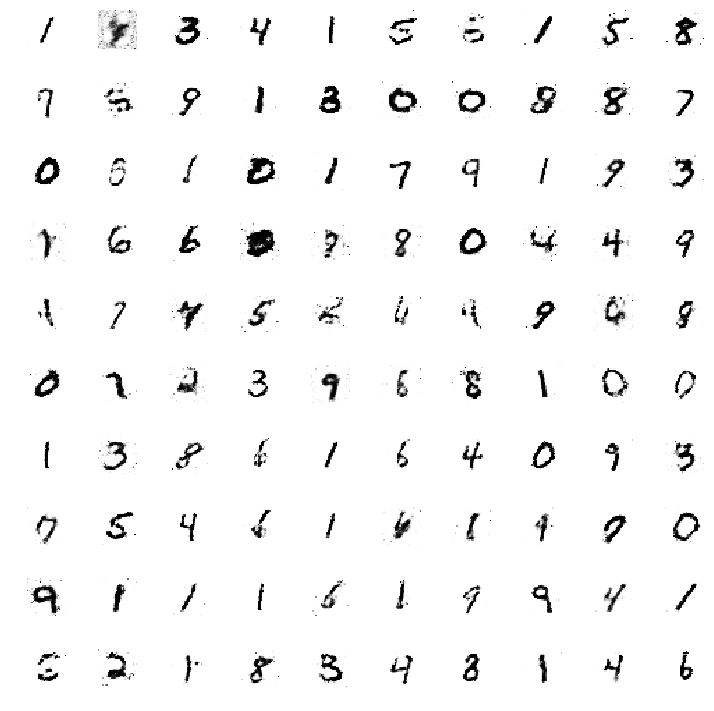

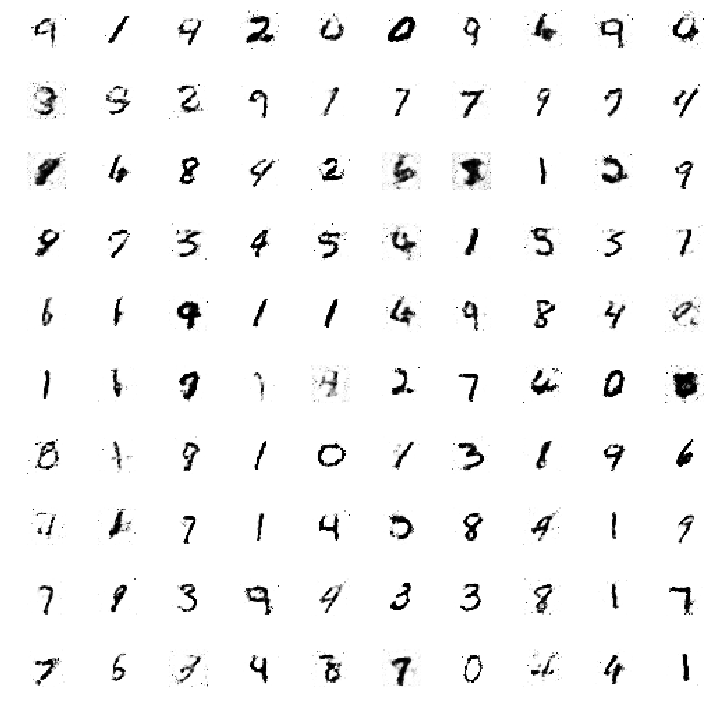

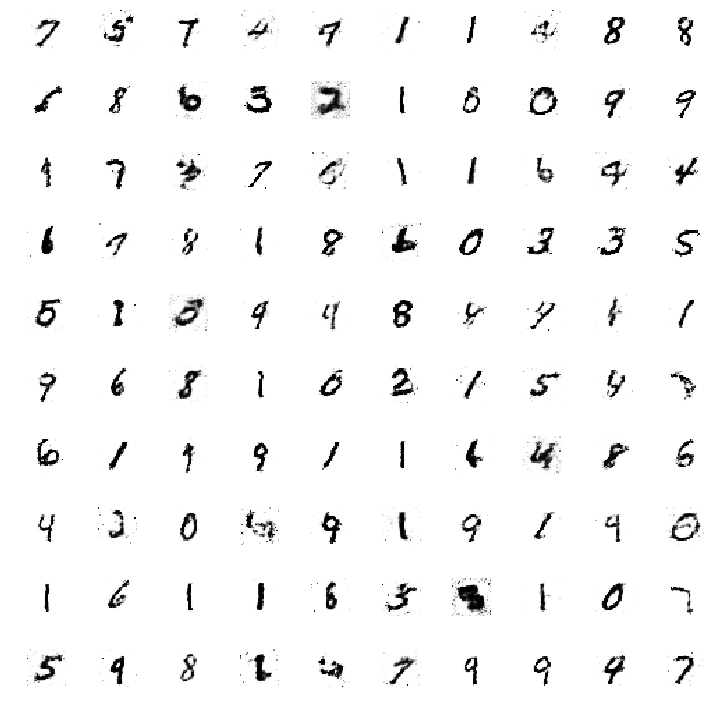

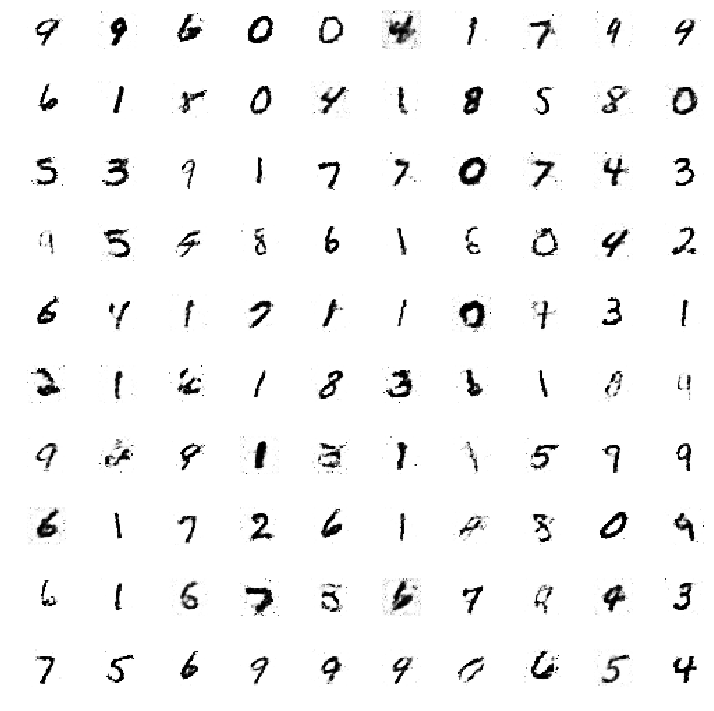

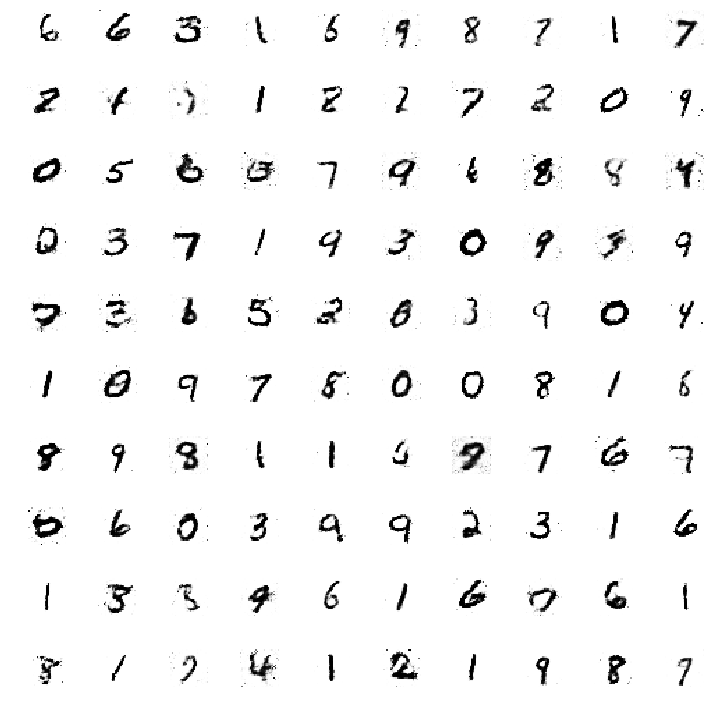

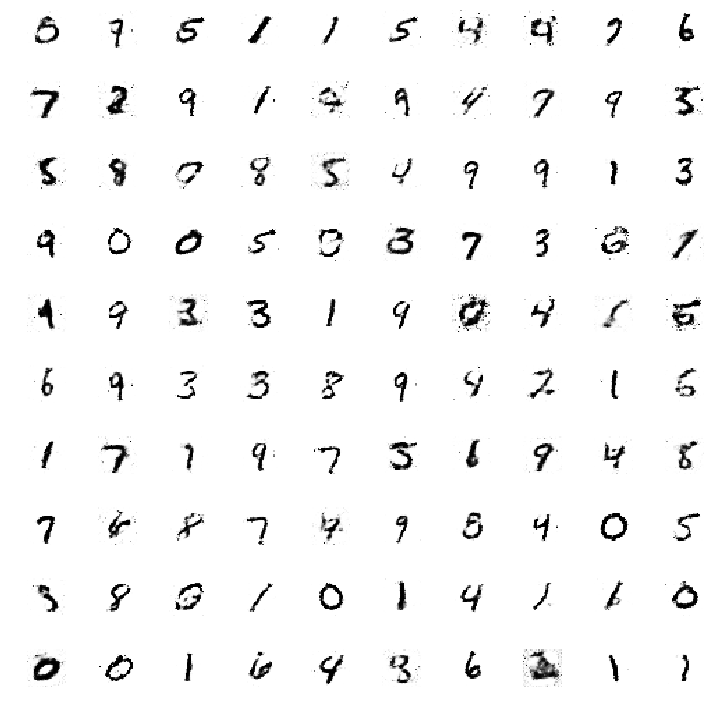

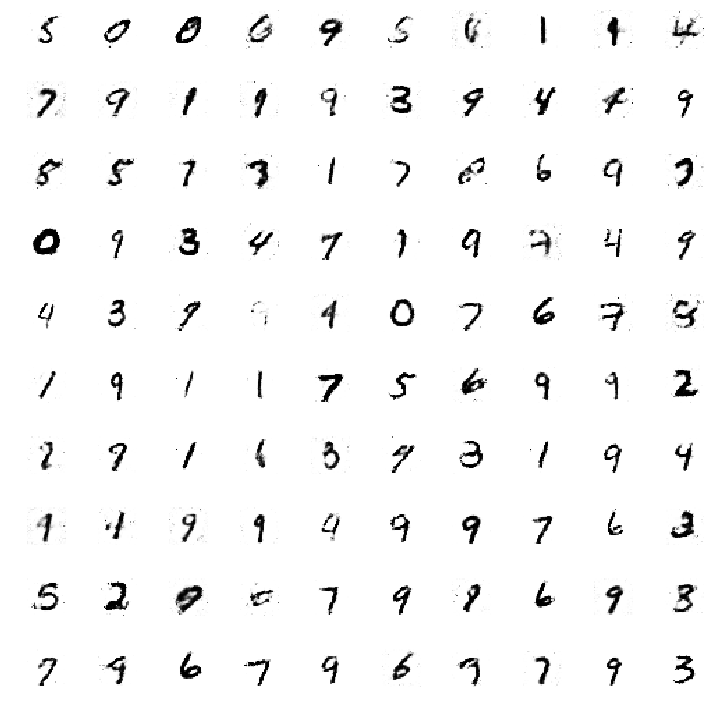

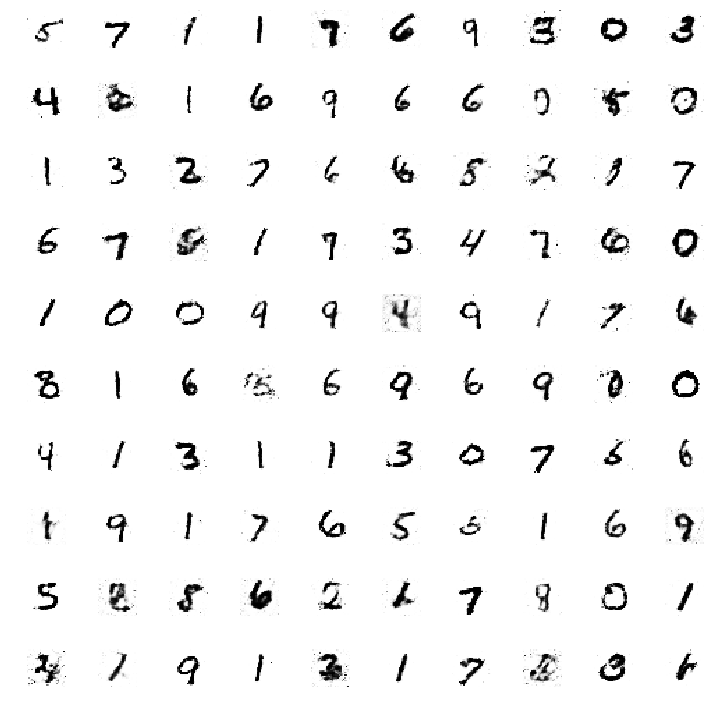

In [21]:
train(200, 128)